In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Leer todas las hojas del Excel
archivo_excel = "trx_recaudacion_km_empresa_54_2020_2025.xlsx"
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Lista para guardar los DataFrames transformados
df_lista = []

for nombre_hoja, df in hojas.items():
    df['LINEA'] = nombre_hoja.strip()  # agregar nombre de hoja como línea
    df_lista.append(df)

# Unir todos los DataFrames
df_final = pd.concat(df_lista, ignore_index=True)

# Reordenar columnas
columnas = ['FECHA', 'LINEA', 'CANT. TRX', 'RECAUDACION', 'KM']
df_final = df_final[columnas]

In [27]:
df_final

,FECHA,LINEA,CANT. TRX,RECAUDACION,KM
0,2020-01-01,166,9121.0,142707.83,8350.738
1,2020-01-02,166,34135.0,493514.22,15555.049
2,2020-01-03,166,37207.0,535227.08,15866.048
3,2020-01-04,166,31732.0,470262.62,16829.046
4,2020-01-05,166,22091.0,329308.39,12240.411
...,...,...,...,...,...
17896,2025-06-07,504I,336.0,127582.38,650.192
17897,2025-06-08,504I,204.0,75651.72,668.249
17898,2025-06-09,504I,967.0,320191.52,946.772
17899,2025-06-10,504I,926.0,289751.48,927.829


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17901 entries, 0 to 17900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17901 non-null  datetime64[ns]
 1   LINEA        17901 non-null  object        
 2   CANT. TRX    17780 non-null  float64       
 3   RECAUDACION  17780 non-null  float64       
 4   KM           17794 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 699.4+ KB


In [34]:
df = df_final.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17780 entries, 0 to 17900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17780 non-null  datetime64[ns]
 1   LINEA        17780 non-null  object        
 2   CANT. TRX    17780 non-null  float64       
 3   RECAUDACION  17780 non-null  float64       
 4   KM           17780 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 833.4+ KB


In [35]:
['FECHA', 'LINEA', 'CANT. TRX', 'RECAUDACION', 'KM']
# Suponiendo que ya tenés el dataframe
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Día de la semana (0=lunes, 6=domingo)
df['weekday'] = df['FECHA'].dt.weekday

df['nombre_dia'] = df['FECHA'].dt.day_name()

#aseguro el orden correcto de los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nombre_dia'] = pd.Categorical(df['nombre_dia'], categories=dias_ordenados, ordered=True)

# Mes (1-12)
df['month'] = df['FECHA'].dt.month

df['nombre_mes'] = df['FECHA'].dt.month_name()

# Para asegurar el orden correcto
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df['nombre_mes'] = pd.Categorical(df['nombre_mes'], categories=meses_ordenados, ordered=True)

# Variables cíclicas
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


C:\Users\mbernardo\AppData\Local\Temp\ipykernel_29940\3029124075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA'] = pd.to_datetime(df['FECHA'])
C:\Users\mbernardo\AppData\Local\Temp\ipykernel_29940\3029124075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['FECHA'].dt.weekday
C:\Users\mbernardo\AppData\Local\Temp\ipykernel_29940\3029124075.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

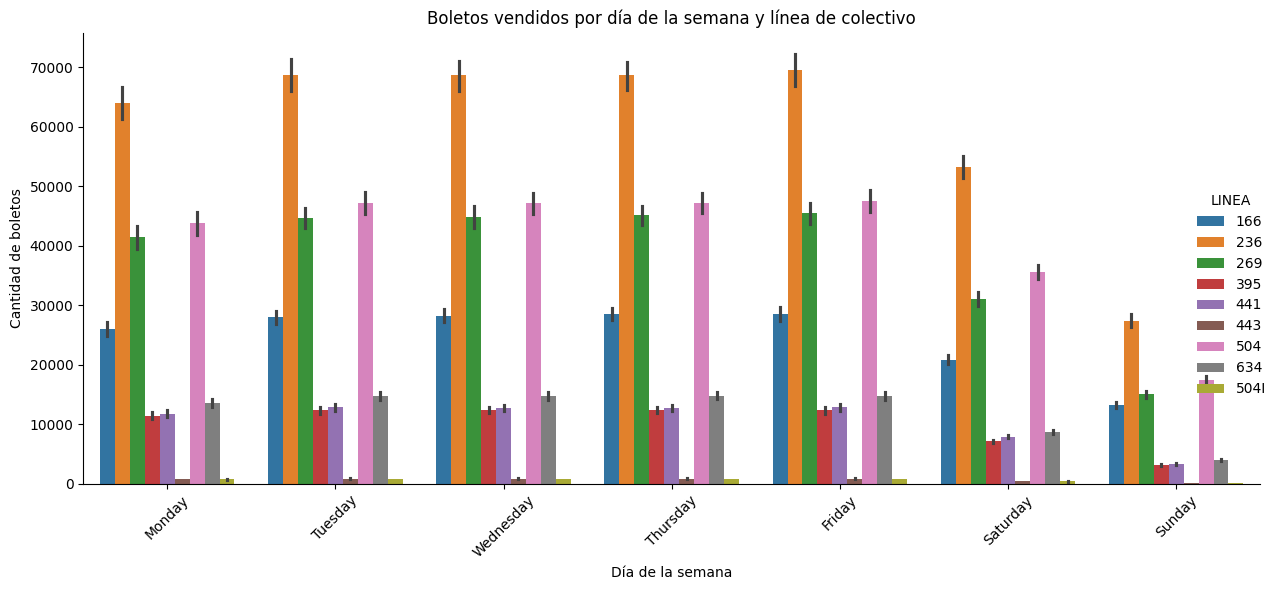

In [36]:
sns.catplot(
    data=df,
    kind="bar",
    x="nombre_dia",
    y='CANT. TRX',
    hue="LINEA",
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por día de la semana y línea de colectivo")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

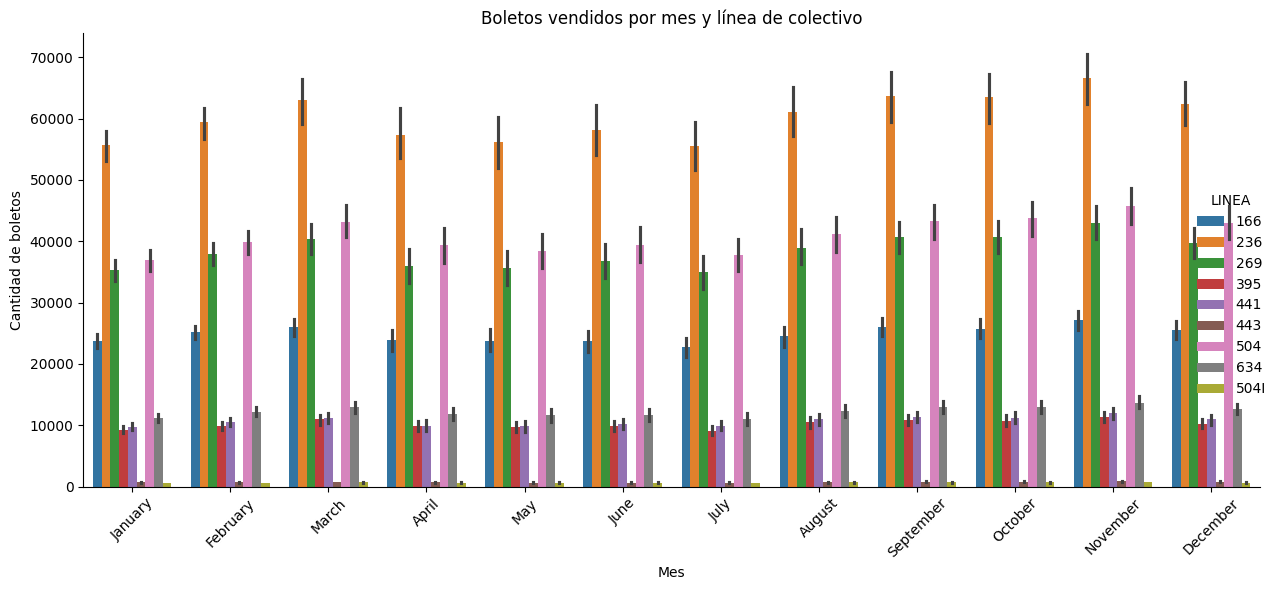

In [37]:

sns.catplot(
    data=df,
    kind="bar",
    x="nombre_mes",
    y='CANT. TRX',
    hue='LINEA',
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por mes y línea de colectivo")
plt.xlabel("Mes")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\mbernardo\AppData\Local\Temp\ipykernel_29940\1030630302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()


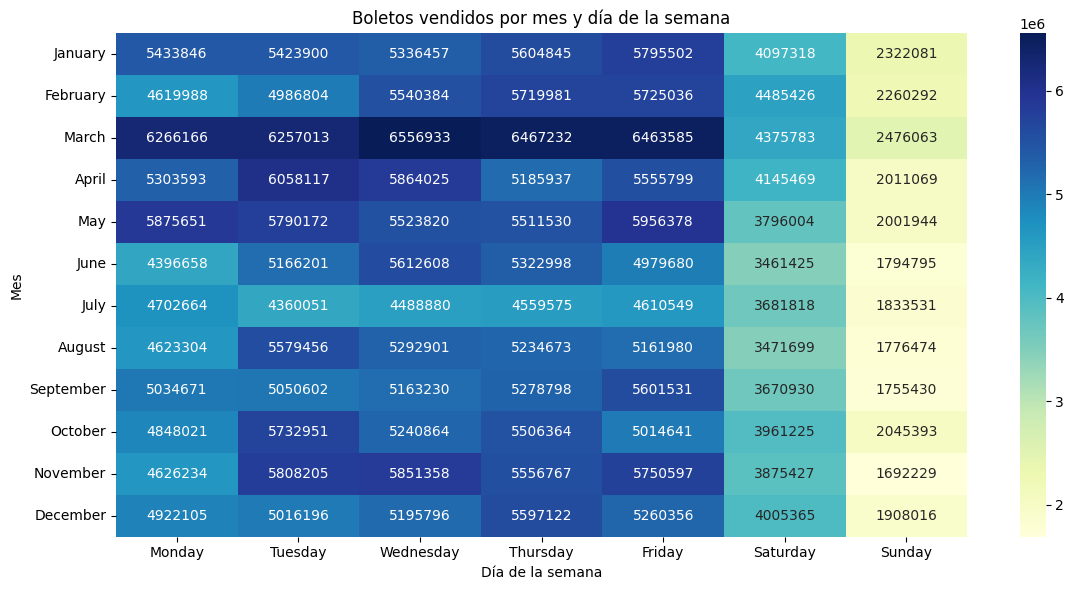

In [38]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Boletos vendidos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

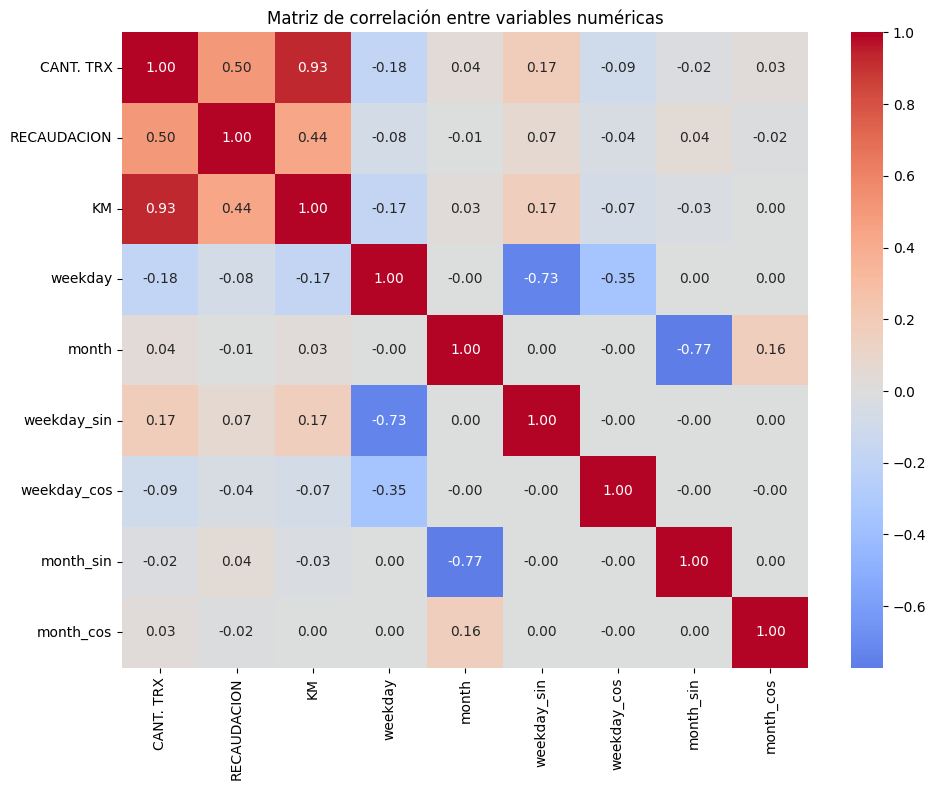

In [39]:
correlaciones = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

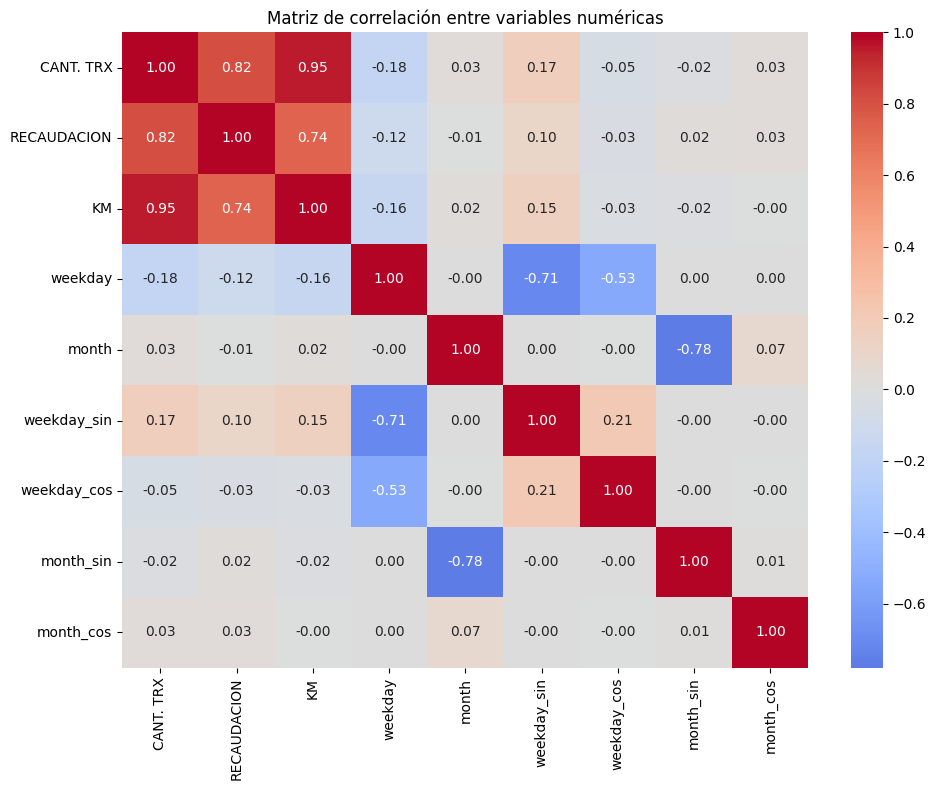

In [40]:
correlaciones = df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

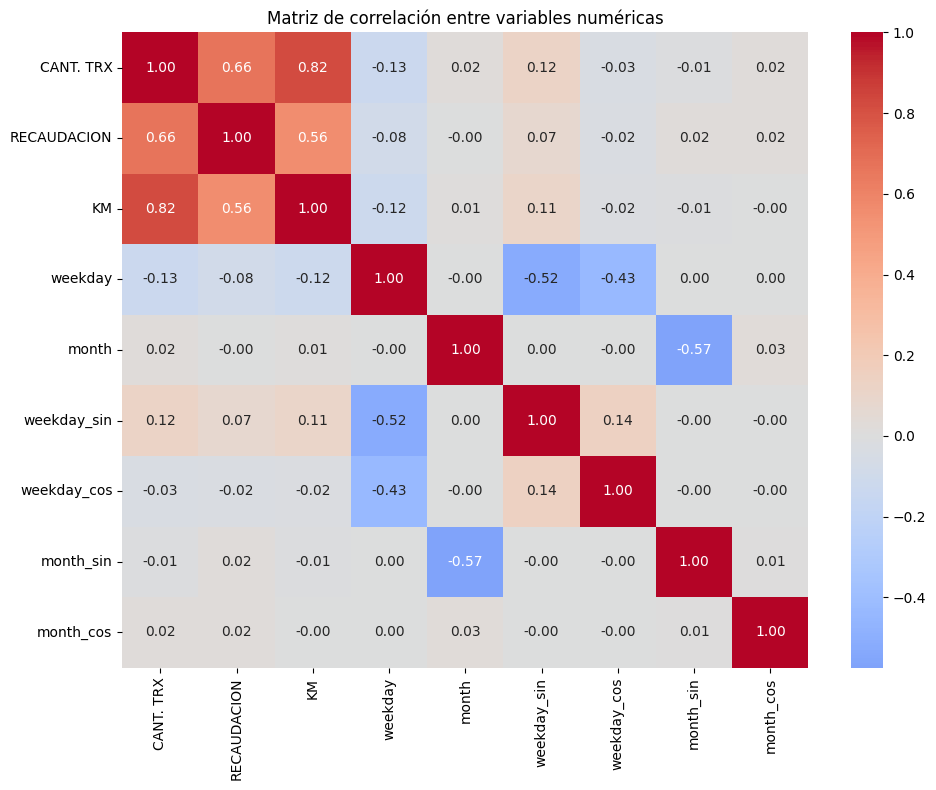

In [41]:
correlaciones = df.corr(method='kendall', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

In [42]:

# aplica one-hot encoding a la columna 'LINEA'
df = pd.get_dummies(df, columns=['LINEA'], drop_first=True)

## Entrenamiento del modelo

In [43]:
X = df.drop(columns=['FECHA', 'CANT. TRX', 'nombre_dia', 'nombre_mes'])  # Eliminar columnas no predictoras
y = df['CANT. TRX']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

R²: 0.9074798100095289
MAE: 4453.26666121406
MSE: 48471479.09230671
RMSE: 6962.146155626633
MAPE: 246.06539797537766
